# Quantum Kernel Alignment with Qiskit Runtime

<br>

**Classification with Support Vector Machines**<br>
Classification problems are widespread in machine learning applications. Examples include credit card risk, handwriting recognition, and medical diagnosis. One approach to tackling classification problems is the support vector machine (SVM) [1,2]. This supervised learning algorithm uses labeled data samples to train a model that can predict to which class a test sample belongs. It does this by finding a separating hyperplane maximizing the margin between data classes. Often, data is not linearly separable in the original space. In these cases, the kernel trick is used to implicitly encode a transformation of the data into a higher-dimensional feature space, through the inner product between pairs of data points, where the data may become separable.

**Quantum Kernels**<br>
Quantum computers can be used to encode classical data in a quantum-enhanced feature space. In 2019, IBM introduced an algorithm called the quantum kernel estimator (QKE) for computing quantum kernels [3]. This algorithm uses quantum circuits with data provided classically and offers an efficient way to evaluate inner products between data in a quantum feature space. For two data samples $\theta$ and $\theta'$, the kernel matrix is given as

$$
    K(\theta, \theta') = \lvert\langle 0^n \rvert U^\dagger(\theta) U(\theta') \lvert 0^n \rangle \rvert^2,
$$

where $U(\theta)$ prepares the quantum feature state. Quantum kernels used in a classification framework inherit the convex optimization program of the SVM and avoid common limitations of variational quantum classifiers. A key observation of this paper was that a necessary condition for a computational advantage requires quantum circuits for the kernel that are hard to simulate classically. More recently, IBM proved that quantum kernels can offer superpolynomial speedups over any classical learner on a learning problem based on the hardness of the discrete logarithm problem [4]. This means that quantum kernels can someday offer quantum advantage on suitable problems. 


**Quantum Kernels that Exploit Structure in Data**<br>
An important approach in the search for practical quantum advantage in machine learning is to identify quantum kernels for learning problems that have underlying structure in the data. We've taken a step in this direction in our recent paper [5], where we introduced a broad class of quantum kernels that exploit group structure in data. Examples of learning problems for data with group structure could include learning permutations or classifying translations. We call this new class of kernels _covariant quantum kernels_ as they are related to covariant quantum measurements. The quantum feature map is defined by a unitary representation $D(\theta)$ of a group $G$ for some element $\theta \in G$, and a fiducial reference state $\lvert\psi\rangle = V\lvert0^n\rangle$ prepared by a unitary circuit $V$. The kernel matrix is given as

$$
    K(\theta, \theta') = \vert\langle 0^n \rvert V^\dagger D^\dagger(\theta) D(\theta') V \lvert 0^n \rangle \rvert^2. \qquad (1)
$$

In general, the choice of the fiducial state is not known _a priori_ and can significantly impact the performance of the classifier. Here, we use a method called quantum kernel alignment (QKA) to find a good fiducial state for a given group.

**Aligning Quantum Kernels on a Dataset**<br>
In practice, SVMs require a choice of the kernel function. Sometimes, symmetries in the data can inform this selection, other times it is chosen in an ad hoc manner. Kernel alignment is one approach to learning a kernel on a given dataset by iteratively adapting it to have high similarity to a target kernel informed from the underlying data distribution [6]. As a result, the SVM with an aligned kernel will likely generalize better to new data than with an unaligned kernel. Using this concept, we introduced in [5] an algorithm for quantum kernel alignment, which provides a way to learn a quantum kernel from a family of kernels. Specifically, the algorithm optimizes the parameters in a quantum circuit to maximize the alignment of a kernel while converging to the maximum SVM margin. In the context of covariant quantum kernels, we extend Eq. $(1)$ to

$$
    K_\lambda(\theta,\theta') = \lvert\langle 0^n \rvert V^\dagger_\lambda D^\dagger(\theta) D(\theta') V_\lambda \lvert 0^n \rangle \rvert^2, \qquad (2)
$$

and use QKA to learn a good fiducial state parametrized by $\lambda$ for a given group. 


**Covariant Quantum Kernels on a Specific Learning Problem**<br>
Let's try out QKA on a learning problem. In the following, we'll consider a binary classification problem we call _labeling cosets with error_ [5]. In this problem, we will use a group and a subgroup to form two cosets, which will represent our data classes. We take the group $G = SU(2)^{\otimes n}$ for $n$ qubits, which is the special unitary group of $2\times2$ matrices and has wide applicability in nature, for example, the Standard Model of particle physics and in many condensed matter systems. We take the graph-stabilizer subgroup $S_{\mathrm{graph}} \in G$ with $S_{\mathrm{graph}} = \langle \{ X_i \otimes_{k:(k,i) \in \mathcal{E}} Z_k \}_{i \in \mathcal{V}} \rangle$ for a graph $(\mathcal{E},\mathcal{V})$ with edges $\mathcal{E}$ and vertices $\mathcal{V}$. Note that the stabilizers fix a stabilizer state such that $D_s \lvert \psi\rangle = \lvert \psi\rangle$. This observation will be useful a bit later. 

To generate the dataset, we write the rotations of the group as $D(\theta_1, \theta_2, 0)=\exp(i \theta_1 X) \exp(i \theta_2 Z) \in SU(2)$, so that each qubit is parametrized by the first two Euler angles (the third we set to zero). Then, we draw randomly two sets of angles $\mathbf{\theta}_\pm \in [-\pi/4, \pi/4]^{2n}$ for the $n$-qubit problem. From these two sets, we construct a binary classification problem by forming two left-cosets (representing the two classes) with those angles, $C_\pm = D(\mathbf{\theta}_\pm) S_{\mathrm{graph}}$ where $D(\mathbf{\theta}_\pm) = \otimes_{k=1}^n D(\theta_\pm^{2k-1}, \theta_\pm^{2k}, 0)$. Note that the elements of the cosets can again be written in terms of Euler angles. We build training and testing sets by randomly drawing elements from $C_\pm$ such that the dataset has samples $i=1,...,m$ containing the first two Euler angles for each qubit $\mathbf{\theta}_{y_i} = (\theta_{y_i}^{1}, \theta_{y_i}^{2}, \theta_{y_i}^{3}, \theta_{y_i}^{4}, ..., \theta_{y_i}^{2n-1}, \theta_{y_i}^{2n})$ and labels $y_i \in \{-1,1\}$ that indicate to which coset a sample belongs.

Next, we select a fiducial state. A natural candidate is the stabilizer state we encountered above. Why? Because this is a subgroup invariant state, $D_s\lvert\psi\rangle = \lvert\psi\rangle$, which causes the data for a given coset to be mapped to a unique state: $D(\mathbf{\theta}_\pm)D_s \lvert\psi\rangle = D(\mathbf{\theta}_\pm) \lvert\psi\rangle$. This means the classifier only needs to distinguish the _two_ states $D(\mathbf{\theta}_\pm) \lvert\psi\rangle \langle \psi\rvert D^\dagger(\mathbf{\theta}_\pm)$ for every element of the coset. In this tutorial, we will add a small Gaussian error with variance $0.01$ to the Euler angles of the dataset. This noise will perturb these two states, but if the variance is sufficiently small, we expect the states will still be classified correctly. Let's consider a parametrized version of the stabilizer state, associated with the coupling graph $(\mathcal{E},\mathcal{V})$ given by the device connectivity, as our fiducial state and then use kernel alignment to find its optimal parameters. Specifically, we'll replace the initial layers of Hadamards in the graph state with $y$-rotations by an angle $\lambda$,

$$
\lvert \psi_\lambda\rangle = V_\lambda \lvert 0^n\rangle = \prod_{(k,t) \in \mathcal{E}} CZ_{k,t} \prod_{k \in \mathcal{V}} \exp\left(i \frac{\lambda}{2} Y_k\right)\lvert 0^n\rangle,
$$

where $CZ=\mathrm{diag}(1,1,1,-1)$. Then, given two samples from our dataset, $\mathbf{\theta}$ and $\mathbf{\theta}'$, the kernel matrix is evaluated as in Eq. $(2)$. If we initialize the kernel with $\lambda \approx 0$, we expect the quantum kernel alignment algorithm to converge towards the optimal $\lambda = \pi/2$ and the classifier to yield 100\% test accuracy.

Let's define two specific problem instances to test these ideas out. We'll be using the quantum device `ibmq_montreal`, with coupling map shown below:

<br>
<img src="images/chip.png" width="500">
<br>

We'll pick two different subgraphs, one for 7 qubits and one for 10, to define our problem instances. Using these subgraphs, we'll generate the corresponding datasets as described above, and then align the quantum kernel with QKA to learn a good fiducial state.

<br>
<img src="images/subgraphs.png" width="550">
<br>

**Speeding up Algorithms with Qiskit Runtime**<br>
QKA is an iterative quantum-classical algorithm, in which quantum hardware is used to execute parametrized quantum circuits for evaluating the quantum kernel matrices with QKE, while a classical optimizer tunes the parameters of those circuits to maximize the alignment. Iterative algorithms of this type can be slow due to latency between the quantum and classical calculations. Qiskit Runtime is a new architecture that can speed up iterative algorithms like QKA by co-locating classical computations with the quantum hardware executions. In this tutorial, we'll use QKA with Qiskit Runtime to learn a good quantum kernel for the _labeling cosets with error_ problem defined above.

<br>

**References**<br>
[1] B. E. Boser, I. M. Guyon,  and V. N. Vapnik, Proceedings of the Fifth Annual Workshop on Computational Learning Theory, COLT ’92 (Association for Computing Machinery, New York, NY, USA, 1992) pp. 144-152 [link](https://doi.org/10.1145/130385.130401) <br>
[2] V. Vapnik, The Nature of Statistical Learning Theory, Information Science and Statistics (Springer New York, 2013) [link](https://books.google.com/books?id=EqgACAAAQBAJ) <br>
[3] V. Havlíček, A. D. Córcoles, K. Temme, A. W. Harrow, A. Kandala, J. M. Chow, and J. M. Gambetta, Nature 567, 209-212 (2019) [link](https://doi.org/10.1038/s41586-019-0980-2) <br>
[4] Y. Liu, S. Arunachalam, and K. Temme, arXiv:2010.02174 (2020) [link](https://arxiv.org/abs/2010.02174) <br>
[5] J. R. Glick, T. P. Gujarati, A. D. Córcoles, Y. Kim, A. Kandala, J. M. Gambetta, K. Temme, arXiv:2105.03406 (2021) [link](https://arxiv.org/abs/2105.03406)<br>
[6] N. Cristianini, J. Shawe-taylor, A. Elisseeff, and J. Kandola, Advances in Neural Information Processing Systems 14 (2001) [link](https://proceedings.neurips.cc/paper/2001/file/1f71e393b3809197ed66df836fe833e5-Paper.pdf) <br>


# Load your IBM Quantum account and get the quantum backend

We'll be using the 27-qubit device `ibmq_montreal` for this tutorial.

In [1]:
import numpy as np# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from typing import Optional, List, Union, Tuple
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library.arithmetic.piecewise_linear_pauli_rotations import PiecewiseLinearPauliRotations
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import IterativeAmplitudeEstimation
from qiskit_finance.circuit.library import LogNormalDistribution
from numpy import random
from qiskit.converters.circuit_to_dag import circuit_to_dag
from qiskit.converters.dag_to_circuit import dag_to_circuit
from qiskit.compiler import transpile
from qiskit.exceptions import QiskitError
import matplotlib.pyplot as plt
from qiskit.utils import QuantumInstance
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute# Loading your IBM Quantum account(s)
acceso = 'CSIC' # CSIC
#acceso = 'EXTERNO' # Pablo
Backend_qubits = 10# Loading your IBM Quantum account(s)
IBMQ.load_account()
print (acceso)
if acceso == 'CSIC' :
# number of qubits to represent the uncertainty ***********************************************************************************************************
    numero_de_qbits_de_incertidumbre = 3
#**********************************************************************************************************************************************************
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q-csic')
    provider.backends()
    from qiskit.providers.ibmq import least_busy
    #backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= Backend_qubits and not b.configuration().simulator and b.status().operational==True))
    #print (backend)
    sistema_cuantico = 'ibmq_montreal'
    print (sistema_cuantico)
    backend = provider.get_backend(sistema_cuantico)
else :
# number of qubits to represent the uncertainty ***********************************************************************************************************
    numero_de_qbits_de_incertidumbre = 3
#**********************************************************************************************************************************************************
# Loading your IBM Quantum account(s)
    provider = IBMQ.load_account()
    sistema_cuantico = 'ibmq_belem'
    backend = provider.get_backend(sistema_cuantico)
    print (sistema_cuantico)#provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
ibmqfactory.load_account:WARNING:2022-03-08 12:53:22,865: Credentials are already in use. The existing account in the session will be replaced.


CSIC
ibmq_montreal


In [2]:
import sys
sys.path.insert(0, 'qiskit-runtime') # Path al repositorio de RUNTIME desde IBM Quantum Lab


In [3]:
#   !git clone https://github.com/Qiskit-Partners/qiskit-runtime.git

# Invoke the Quantum Kernel Alignment program

Before executing the runtime program for QKA, we need to prepare the dataset and configure the input parameters for the algorithm.

### 1. Prepare the dataset

First, we load the dataset from the `csv` file and then extract the labeled training and test samples. Here, we'll look at the 7-qubit problem, shown above in subfigure a). A second dataset is also available for the 10-qubit problem in b).

In [4]:
# Libraries needed for the tutorial

import pandas as pd
import requests
import io
    
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/Qiskit-Partners/qiskit-runtime/main/qiskit_runtime/qka/aux_file/dataset_graph7.csv" # Make sure the url is the raw version of the file on GitHub

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(url,header= None)

data = df.values

Let's take a look at the data to see how it's formatted. Each row of the dataset contains a list of Euler angles, followed by the class label $\pm1$ in the last column. For an $n$-qubit problem, there are $2n$ features corresponding to the first two Euler angles for each qubit (recall discussion above). The rows alternate between class labels.

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.193574,0.113979,-0.005927,0.300957,-0.358603,-0.087866,-0.156226,0.342442,-0.016003,0.143113,0.256422,-0.164125,-0.136743,0.014674,1.0
1,-0.100006,0.002431,0.244218,0.126870,-0.063891,-0.085588,0.072490,0.042986,-0.052714,0.019754,-0.159314,-0.409991,-0.199615,0.053845,-1.0
2,-1.774448,-0.047642,-0.025880,0.252708,-0.350689,-1.604509,-0.114874,0.347631,0.059501,-0.168956,0.351014,-0.128586,0.098897,-0.047799,1.0
3,-0.211585,-0.043782,-1.560226,0.018510,-0.051867,-0.128508,0.218609,-0.075632,-0.183656,-1.715292,-0.105361,-0.300758,-0.566431,0.046542,-1.0
4,-0.105965,0.208387,-0.003896,0.163816,-0.332541,-1.594675,-1.889321,-0.251937,0.374445,-1.431062,0.290588,0.118851,0.048799,-0.073023,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-1.860920,-0.030419,-1.688612,0.007305,0.066572,-1.711844,-1.393033,-0.083453,0.055720,-1.518301,-1.576734,0.208194,-1.813403,-0.106302,-1.0
124,-0.316567,-1.599647,0.113329,-1.413006,-1.761544,-0.044818,-1.810205,-0.289997,-1.566337,-0.277979,-1.298275,-1.490769,-1.663696,-1.562536,1.0
125,-1.489406,-1.564369,-0.012539,0.023483,-1.559397,-1.477378,-1.423428,-1.385349,-0.111253,0.088187,-1.501800,-1.270020,-1.645927,-0.106986,-1.0
126,-1.744036,-1.852529,-0.048826,-1.300941,-1.853251,-1.660622,-1.767232,-0.162640,-1.314748,-0.055515,-1.308294,-1.485198,-1.535383,-1.519175,1.0


Now, let's explicitly construct the training and test samples (denoted `x`) and their labels (denoted `y`).

In [6]:
import numpy as np

# choose number of training and test samples per class:
num_train = 10
num_test = 10

# extract training and test sets and sort them by class label
train = data[:2*num_train, :]
test = data[2*num_train:2*(num_train+num_test), :]

ind=np.argsort(train[:,-1])
x_train = train[ind][:,:-1]
y_train = train[ind][:,-1]

ind=np.argsort(test[:,-1])
x_test = test[ind][:,:-1]
y_test = test[ind][:,-1]


### 2. Configure the QKA algorithm

The first task is to set up the feature map and its entangler map, which specifies the arrangement of $CZ$ gates in the fiducial state. We will choose this to match the connectivity of the problem subgraph, pictured above. We also initialize the fiducial state parameter $\lambda$ with `initial_point`.

In [7]:
from qiskit_runtime.qka import FeatureMap


d = np.shape(data)[1]-1                                         # feature dimension is twice the qubit number

em = [[0,2],[3,4],[2,5],[1,4],[2,3],[4,6]]                      # we'll match this to the 7-qubit graph              
# em = [[0,1],[2,3],[4,5],[6,7],[8,9],[1,2],[3,4],[5,6],[7,8]]  # we'll match this to the 10-qubit graph

fm = FeatureMap(feature_dimension=d, entangler_map=em)          # define the feature map
initial_point = [0.1]                                           # set the initial parameter for the feature map

Let's print out the circuit for the feature map (the circuit for the kernel will be a feature map for one data sample composed with an inverse feature map for a second sample). The first part of the feature map is the fiducial state, which is prepared with a layer of $y$ rotations followed by $CZ$s. Then, the last two layers of $z$ and $x$ rotations in the circuit denote the group representation $D(\theta)$ for a data sample $\theta$. Note that a single-qubit rotation is defined as $RP(\phi) = \exp(- i [\phi/2] P)$ for $P \in {X, Y, Z}$.

In [8]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(fm.construct_circuit(x=x_train[0], parameters=initial_point), 
               output='text', fold=200)

┌──────────┐   ┌──────────────┐ ┌────────────┐                                                 
q_0: ┤ Ry(-0.1) ├─■─┤ Rz(-0.38383) ├─┤ Rx(3.3378) ├─────────────────────────────────────────────────
     ├──────────┤ │ └──────────────┘ └────────────┘┌──────────────┐ ┌──────────────┐                
q_1: ┤ Ry(-0.1) ├─┼────────────────────────■───────┤ Rz(-0.11811) ├─┤ Rx(-0.20449) ├────────────────
     ├──────────┤ │                        │       └──────────────┘ └┬────────────┬┘┌─────────────┐ 
q_2: ┤ Ry(-0.1) ├─■────────■───────────────┼──────────────■──────────┤ Rz(3.4802) ├─┤ Rx(0.15495) ├─
     ├──────────┤          │               │              │         ┌┴────────────┤ ├─────────────┴┐
q_3: ┤ Ry(-0.1) ├─■────────┼───────────────┼──────────────■─────────┤ Rz(0.34764) ├─┤ Rx(-0.54085) ├
     ├──────────┤ │        │               │                        ├─────────────┤ ├──────────────┤
q_4: ┤ Ry(-0.1) ├─■────────┼───────────────■──────────────■─────────┤ Rz(0.34312) ├─┤ Rx(-0.14015) ├
     ├──────────┤          │        ┌─────────────┐       │        ┌┴─────────────┴┐└──────────────┘
q_5: ┤ Ry(-0.1) ├──────────■────────┤ Rz(0.51497) ├───────┼────────┤ Rx(-0.029293) ├────────────────
     ├──────────┤                   └─────────────┘       │        └┬──────────────┤┌─────────────┐ 
q_6: ┤ Ry(-0.1) ├─────────────────────────────────────────■─────────┤ Rz(-0.42725) ├┤ Rx(0.44115) ├─
     └──────────┘                                                   └──────────────┘└─────────────┘

Next, we set the values for the SVM soft-margin penalty `C` and the number of SPSA iterations `maxiters` we use to align the quantum kernel.

In [9]:
C = 1                                                           # SVM soft-margin penalty
maxiters = 10                                                   # number of SPSA iterations

Finally, we decide how to map the virtual qubits of our problem graph to the physical qubits of the hardware. For example, in the 7-qubit problem, we can directly map the virtual qubits `[0, 1, 2, 3, 4, 5, 6]` to the physical qubits `[10, 11, 12, 13, 14, 15, 16]` of the device. This allows us to avoid introducing SWAP gates for qubits that are not connected, which can increase the circuit depth. 

In [10]:
initial_layout = [10, 11, 12, 13, 14, 15, 16]                   # see figure above for the 7-qubit graph
# initial_layout = [9, 8, 11, 14, 16, 19, 22, 25, 24, 23]       # see figure above for the 10-qubit graph

### 3. Set up and run the program

We're almost ready to run the program. First, let's take a look at the program metadata, which includes a description of the input parameters and their default values.

In [11]:
print(provider.runtime.program('quantum-kernel-alignment'))

quantum-kernel-alignment:
  Name: quantum-kernel-alignment
  Description: Quantum kernel alignment algorithm that learns, on a given dataset, a quantum kernel maximizing the SVM classification margin.
  Creation date: 2021-05-06T14:56:53Z
  Update date: 2021-11-10T17:10:19.159734Z
  Max execution time: 28800
  Input parameters:
    Properties:
        - C:
            Type: number
            Default: 1
            Description: Penalty parameter for the soft-margin support vector machine. Default is 1.
            Required: False
        - data:
            Type: array
            Description: NxD array of training data, where N is the number of samples and D is the feature dimension. This is a numpy array.
            Required: True
        - labels:
            Type: array
            Description: Nx1 array of +/-1 labels of the N training samples. This is a numpy array.
            Required: True
        - maxiters:
            Type: integer
            Default: 1
            Descri

We see that this program has several input parameters, which we'll configure below. To run the program, we'll set up its two main components: `inputs` (the input parameters from the program metadata) and `options` (the quantum backend). We'll also define a callback function so that the intermediate results of the algorithm will be printed as the program runs. Note that each step of the algorithm for the settings we've selected here takes approximately 11 minutes.

In [12]:
def interim_result_callback(job_id, interim_result):
    print(f"interim result: {interim_result}\n")

In [13]:
program_inputs = {
    'feature_map': fm,
    'data': x_train,
    'labels': y_train,
    'initial_kernel_parameters': initial_point,
    'maxiters': maxiters,
    'C': C,
    'initial_layout': initial_layout
}

options = {'backend_name': backend.name()}

job = provider.runtime.run(program_id="quantum-kernel-alignment",
                              options=options,
                              inputs=program_inputs,
                              callback=interim_result_callback,
                              )

print(job.job_id())
result = job.result()

c8jl3klp1qlipf745pdg
interim result: {'cost': 10.86710432306609, 'kernel_parameters': array([0.18782357])}

interim result: {'cost': 10.72979108399653, 'kernel_parameters': array([0.33684051])}

interim result: {'cost': 9.939370663494906, 'kernel_parameters': array([0.50135521])}

interim result: {'cost': 8.797571619277, 'kernel_parameters': array([0.66472119])}

interim result: {'cost': 7.548858006063455, 'kernel_parameters': array([0.80805455])}

interim result: {'cost': 6.559251149722632, 'kernel_parameters': array([0.91656584])}

interim result: {'cost': 5.85799065791344, 'kernel_parameters': array([1.00340584])}

interim result: {'cost': 5.5114025311687636, 'kernel_parameters': array([1.07039414])}

interim result: {'cost': 5.195612026815285, 'kernel_parameters': array([1.12548827])}

interim result: {'cost': 4.997232268907078, 'kernel_parameters': array([1.17163723])}

interim result: {'aligned_kernel_parameters': array([1.17163723]), 'aligned_kernel_matrix': array([[1.        , 

### 4. Retrieve the results of the program

Now that we've run the program, we can retrieve the output, which is the aligned kernel parameter and the aligned kernel matrix. Let's also plot this kernel matrix (we'll subtract off the diagonal to show the contrast between the remaining entries). The kernel matrix is expected to have a block-diagonal structure. This reflects the fact that the kernel maps the input data effectively to just two states (modulo the small noise we added to the data; recall the discussion above). That is, data in the same coset (same class label) have a larger overlap than do data from different cosets.

aligned_kernel_parameters: [1.17163723]


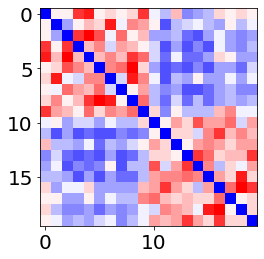

In [14]:
print(f"aligned_kernel_parameters: {result['aligned_kernel_parameters']}")

from matplotlib import pyplot as plt
from pylab import cm
plt.rcParams['font.size'] = 20
plt.imshow(result['aligned_kernel_matrix']-np.identity(2*num_train), cmap=cm.get_cmap('bwr', 20))
plt.show()

# Use the results of the program to test an SVM on new data

Equipped with the aligned kernel and its optimized parameter, we can use the `sklearn` package to train an SVM and then evaluate its classification accuracy on new test points. Note that a second kernel matrix built from the test points is needed for the SVM decision function.

In [15]:
from qiskit_runtime.qka import KernelMatrix
from sklearn.svm import SVC
from sklearn import metrics

# train the SVM with the aligned kernel matrix:

kernel_aligned = result['aligned_kernel_matrix']
model = SVC(C=C, kernel='precomputed')
model.fit(X=kernel_aligned, y=y_train)

# test the SVM on new data:

km = KernelMatrix(feature_map=fm, backend=backend, initial_layout=initial_layout)
kernel_test = km.construct_kernel_matrix(x1_vec=x_test, x2_vec=x_train, parameters=result['aligned_kernel_parameters'])
labels_test = model.predict(X=kernel_test)
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")


accuracy test: 1.0


import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright